In [1]:
import numpy as np
import pandas as pd
import pathlib
import cv2
from scipy import ndimage

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def get_threshold(imgpath):
    dist=[]
    for i in range(0,len(imgpath)):
        bgrimg_thres = cv2.imread(str(imgpath[i]))
        grayimg_thres = cv2.cvtColor(bgrimg_thres,cv2.COLOR_BGR2GRAY)
        img_blur_thres=cv2.blur(grayimg_thres,(7,7),0)
        dist.extend(img_blur_thres.flatten())
    thresh_val=np.percentile(dist,0.1)
    return thresh_val

In [11]:
def region_detect(imgpath,thresh_val):
    bgrimg = cv2.imread(str(imgpath))
    grayimg = cv2.cvtColor(bgrimg,cv2.COLOR_BGR2GRAY)
    img_blur=cv2.blur(grayimg,(7,7),0)
    # Use threshold to fliter out the white blood cell 
    mask=np.where(img_blur>thresh_val,0,1)
    # Detect and label the white blood cell 
    labels,nlabels=ndimage.label(mask)
    slices=ndimage.find_objects(labels)
    # Output the region 
    region=[]
    for i in range(0,nlabels):
        sub_region={'xmin':slices[i][1].start,'xmax':slices[i][1].stop,'ymin':slices[i][0].start,'ymax':slices[i][0].stop}
        region.append(sub_region)
    return region


### Test the Image Detection Performance

In [12]:
train_paths = pathlib.Path('/Users/StevenTseng/Desktop/gallenco/slide_file/a_files/15').glob('*.jpeg')
train_sorted=sorted([path for path in train_paths])
im_path=train_sorted[30:40] # get 10 images
im_path,len(im_path)

([PosixPath('/Users/StevenTseng/Desktop/gallenco/slide_file/a_files/15/0_36.jpeg'),
  PosixPath('/Users/StevenTseng/Desktop/gallenco/slide_file/a_files/15/0_37.jpeg'),
  PosixPath('/Users/StevenTseng/Desktop/gallenco/slide_file/a_files/15/0_38.jpeg'),
  PosixPath('/Users/StevenTseng/Desktop/gallenco/slide_file/a_files/15/0_39.jpeg'),
  PosixPath('/Users/StevenTseng/Desktop/gallenco/slide_file/a_files/15/0_4.jpeg'),
  PosixPath('/Users/StevenTseng/Desktop/gallenco/slide_file/a_files/15/0_40.jpeg'),
  PosixPath('/Users/StevenTseng/Desktop/gallenco/slide_file/a_files/15/0_41.jpeg'),
  PosixPath('/Users/StevenTseng/Desktop/gallenco/slide_file/a_files/15/0_42.jpeg'),
  PosixPath('/Users/StevenTseng/Desktop/gallenco/slide_file/a_files/15/0_43.jpeg'),
  PosixPath('/Users/StevenTseng/Desktop/gallenco/slide_file/a_files/15/0_44.jpeg')],
 10)

In [6]:
def get_detected_img(imgpath,thresh_val):
    test_region=region_detect(imgpath,thresh_val)
    bgrimg = cv2.imread(str(imgpath))
    if len(test_region)>0:
        for i in range(0,len(test_region)):
                testimg=cv2.rectangle(bgrimg, (test_region[i]['xmin'],test_region[i]['ymin']), (test_region[i]['xmax'],test_region[i]['ymax']),(0,0,255),2)
    else:
        testimg=bgrimg
    return testimg

In [13]:
thres_val=get_threshold(im_path)

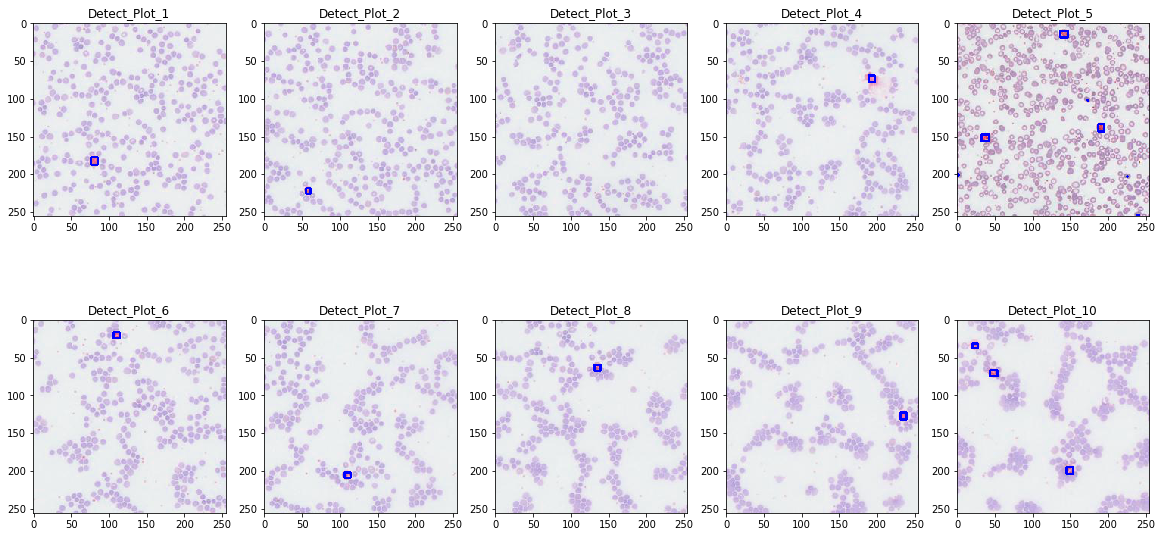

In [14]:
plt.figure(figsize=(20,10))
for i in range(0,len(im_path)):
    plt.subplot(2,len(im_path)/2,i+1)
    plt.imshow(get_detected_img(str(im_path[i]),thres_val))
    plt.title('Detect_Plot_'+str(i+1))